In [1]:
import numpy as np 
import pandas as pd
import datetime # para convertir a dia de la semana
import calendar # idem

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://github.com/idontdomath/datos-exploratory-data-analysis/blob/master/class01/03-intro-pandas-flight-delays.ipynb

In [2]:
# estatus = pd.read_csv('status.csv', sep='\t', iterator=True, chunksize=1000)
#cada vez que se corre son los proximos 500
# estatus.get_chunk(500)

In [3]:
trips = pd.read_csv('trip.csv', low_memory=False)
#Se convierte los dates a datetime64[ns].
trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

In [4]:
#Se agrega una nueva columna date que coincide con weather.
trips['date'] = trips['start_date'].apply(lambda x: x.date())
#Se convierte date a datetime64[ns].
trips['date'] = pd.to_datetime(trips['date'])

In [5]:
# chequeo tipos
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
date                  datetime64[ns]
dtype: object

In [6]:
# ejemplo del uso de datetime con día actual
dia_actual = datetime.datetime.today()
dia_actual

datetime.datetime(2017, 4, 13, 1, 54, 57, 813987)

In [7]:
# lo paso a dia de la semana
dia_actual.weekday()

3

In [8]:
# mejor en palabras que en números
calendar.day_name[dia_actual.weekday()]

'Thursday'

In [9]:
# función para convertir fecha a día de la semana.
def fecha_a_dia(fecha):
    return calendar.day_name[fecha.weekday()]

In [10]:
#Se crean columnas con los dias de la semana.
trips['start_day_of_week'] = trips['start_date'].map(fecha_a_dia)
trips['end_day_of_week'] = trips['end_date'].map(fecha_a_dia)

In [11]:
trips['horario_inicial'] = trips['start_date'].dt.time
trips['horario_inicial_float'] = trips['start_date'].dt.hour + trips['start_date'].dt.minute / 100
#por el momento dejo ambos por si se necesitan

In [12]:
trips['horario_final'] = trips['end_date'].dt.time
trips['horario_final_float'] = trips['end_date'].dt.hour + trips['end_date'].dt.minute / 100
#idem

In [13]:
trips['duracion_viaje'] = trips['end_date'] - trips['start_date']
# trips['duracion_viaje'] = pd.to_datetime(trips['duracion_viaje'])
# no es necesario pero lo dejo por las dudas, puede servir

In [62]:
# vista final de cómo quedó el dataframe
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,2013-08-29,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,2013-08-29,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00


## ¿Viajes de menos de 3 minutos con misma estación de inicio y fin?
Una primera impresión es que hay viajes "ruidosos": duran menos de 3 minutos y las estaciones de inicio y fin
son las mismas. Esto nos dice que el usuario no tomó el viaje por algún motivo. Se van a filtrar esos viajes.

In [15]:
viajes_ruidosos = trips[(trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id'])]
trips = trips[-((trips['duracion_viaje'] <= '00:03:00') & (trips['start_station_id'] == trips['end_station_id']))]
# hay que hacer trips - viajes_ruidosos para que quede lindo pero requiere un comando (isin o algo asi). 
# no me salio bien asi que a lo ultimo lo modifico

In [16]:
viajes_ruidosos.id.count()

2601

In [17]:
viajes_ruidosos.bike_id.value_counts().count()
# cantidad distintas de bicicletas dentro de esos 2601 viajes. Crei que iba a aportar información 
# para lo de las biciletas descompuestas pero no creo que ayude. Hay que analizar si es que varios de esos viajes
# con el mismo id de bicicleta se tomaron bastante pegados entonces si claramente las devolvieron porq estaban rotas

598

Se filtraron unos 2600 viajes. // acá iría la conclusión acerca de posibles bicicletas descompuestas

In [18]:
# no es necesario pero lo dejo por las dudas, puede servir
# trips[-((trips['duracion_viaje'] < '1970-01-01 00:10:00') & (trips['start_station_id'] == trips['end_station_id']))]

In [61]:
# ahora los datos quedan más limpios
trips.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,date,start_day_of_week,end_day_of_week,horario_inicial,horario_inicial_float,horario_final,horario_final_float,duracion_viaje
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,94103,2013-08-29,Thursday,Thursday,12:02:00,12.02,12:04:00,12.04,00:02:00
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,95112,2013-08-29,Thursday,Thursday,13:25:00,13.25,13:27:00,13.27,00:02:00
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,95060,2013-08-29,Thursday,Thursday,11:33:00,11.33,11:35:00,11.35,00:02:00
10,4549,125,2013-08-29 13:52:00,Spear at Folsom,49,2013-08-29 13:55:00,Embarcadero at Bryant,54,368,Subscriber,94109,2013-08-29,Thursday,Thursday,13:52:00,13.52,13:55:00,13.55,00:03:00
11,4498,126,2013-08-29 13:23:00,San Pedro Square,6,2013-08-29 13:25:00,Santa Clara at Almaden,4,26,Subscriber,95112,2013-08-29,Thursday,Thursday,13:23:00,13.23,13:25:00,13.25,00:02:00


# 1) Análisis de viajes según día y horario
### En estos primeros plots se analizará la relación general entre los viajes y el día/horario de la semana.

### ¿El servicio se usa más en la semana o los fines de semana?

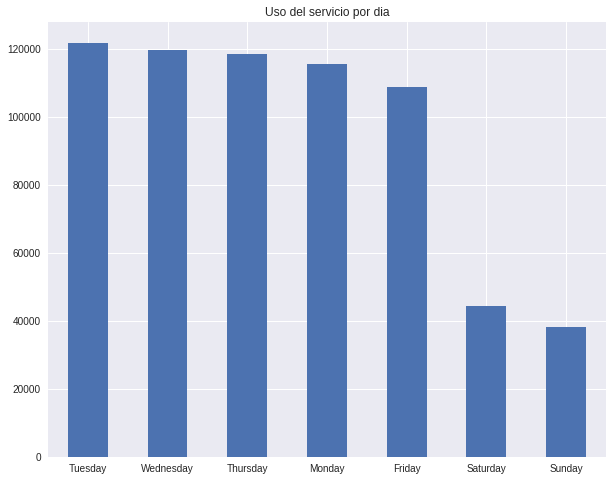

In [20]:
trips['start_day_of_week'].value_counts().plot(kind='bar', rot=0, figsize=(10,8));
plt.title('Uso del servicio por dia');

In [21]:
dias = trips[['start_day_of_week']]
dias_semana = dias[-(dias['start_day_of_week'] == "Saturday")]
dias_semana = dias[-(dias['start_day_of_week'] == "Sunday")]
dias_finde = dias[(dias['start_day_of_week'] == "Saturday") | (dias['start_day_of_week'] == "Sunday")]

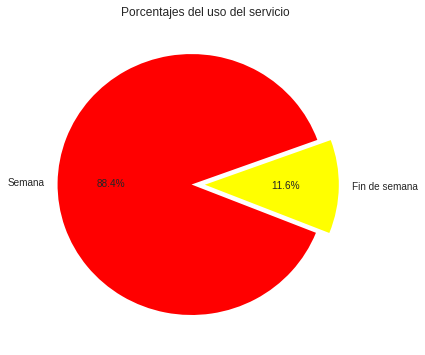

In [22]:
sizes = [dias_semana.start_day_of_week.count(), dias_finde.start_day_of_week.count()]
nombres = ['Semana', 'Fin de semana']

plt.figure(figsize=(6, 6))
plt.title('Porcentajes del uso del servicio')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['red', 'yellow'], explode=(0.1, 0))
plt.show()

Se ve que hay una diferencia drástica en el uso del servicio entre la semana y el fin de semana.

### Promedio del uso del servicio por horario:

In [80]:
semana_entera = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name']].round()
semana_entera['horario_inicial_float'] = semana_entera['horario_inicial_float'].map(lambda x: x if x != 24 else 0)
# 24hs = 0hs
semana_entera.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name
4,Thursday,12.0,South Van Ness at Market,Market at 10th
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden
9,Thursday,11.0,San Jose City Hall,MLK Library
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden


In [81]:
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Saturday")]
semana = semana_entera[-(semana_entera['start_day_of_week'] == "Sunday")]

In [82]:
semana['apariciones'] = semana['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_semana = semana[['horario_inicial_float', 'apariciones']]
semana = semana.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_semana_contador = horarios_semana.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


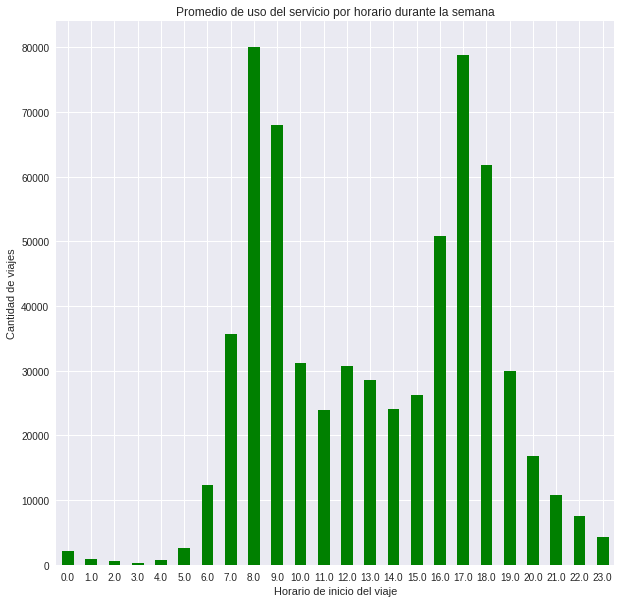

In [83]:
horarios_semana_contador.plot.bar(rot=0, figsize=(10,10), color='green');
plt.ylabel('Cantidad de viajes')
plt.xlabel('Horario de inicio del viaje')
plt.title('Promedio de uso del servicio por horario durante la semana')
plt.legend('')
plt.show()

Se aprecia que durante la semana los horarios pico son de 8 a 9 y de 18 a 19, particularmente cuando la gente va y cuando regresa al trabajo, escuela, etc.

In [84]:
finde = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Sunday")]

In [85]:
finde['apariciones'] = finde['start_day_of_week'].map(lambda x: 1) # seteo todas las rows con 1 para despues agrupar
horarios_finde = finde[['horario_inicial_float', 'apariciones']]
finde = finde.drop('apariciones', 1) # vuelvo a dejar el dt como antes
horarios_finde_contador = horarios_finde.groupby('horario_inicial_float').aggregate(sum)

/home/rodrigo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


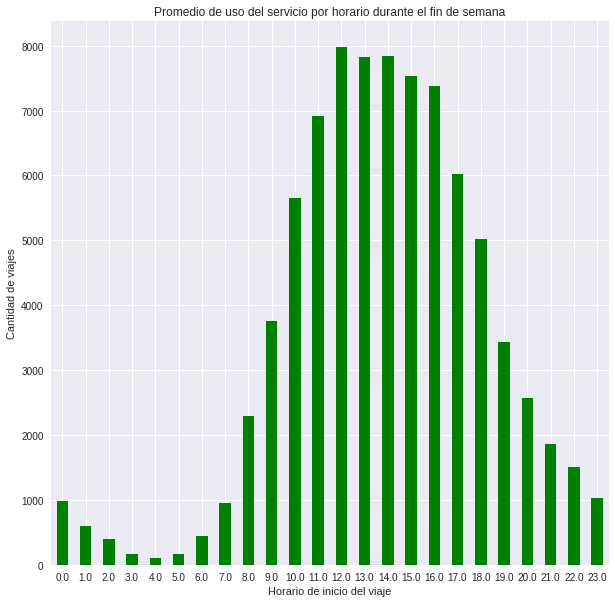

In [86]:
horarios_finde_contador.plot.bar(rot=0, figsize=(10,10), color='green');
plt.ylabel('Cantidad de viajes')
plt.xlabel('Horario de inicio del viaje')
plt.title('Promedio de uso del servicio por horario durante el fin de semana')
plt.legend('')
plt.show()

Los horarios pico los fines de semana son de 11 a 16. También lo que se observa es la disminución del uso del servicio al llegar la noche a pesar de que sea fin de semana. En el siguiente plot se va a analizar esa comparación.

In [88]:
viajes_en_hora_pico_finde = finde[((finde['horario_inicial_float'] >= 11) & (finde['horario_inicial_float'] <= 16))]
viajes_finde_noche = finde[((finde['horario_inicial_float'] >= 20) & (finde['horario_inicial_float'] < 24))]

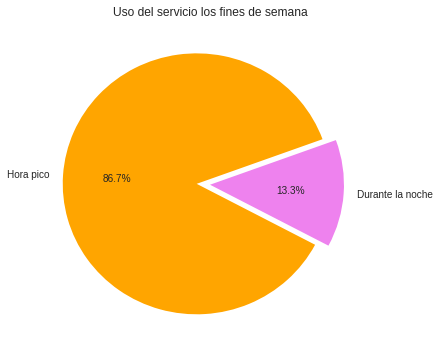

In [89]:
sizes = [viajes_en_hora_pico_finde.start_day_of_week.count(), viajes_finde_noche.start_day_of_week.count()]
nombres = ['Hora pico', 'Durante la noche']

plt.figure(figsize=(6, 6))
plt.title('Uso del servicio los fines de semana')
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange', 'violet'], explode=(0.1, 0))
plt.show()

## A) Análisis de los horarios importantes
### Se analizarán los destinos y trayectos más populares en los horarios críticos de la semana y fin de semana.

In [32]:
viajes_en_hora_pico_semana = semana[((semana['horario_inicial_float'] >= 8) & (semana['horario_inicial_float'] <= 9)) 
                                   | ((semana['horario_inicial_float'] >= 18) & (semana['horario_inicial_float'] <= 19))]

In [33]:
destinos_mas_populares_hora_pico_semana = viajes_en_hora_pico_semana['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_semana = destinos_mas_populares_hora_pico_semana.head(10)

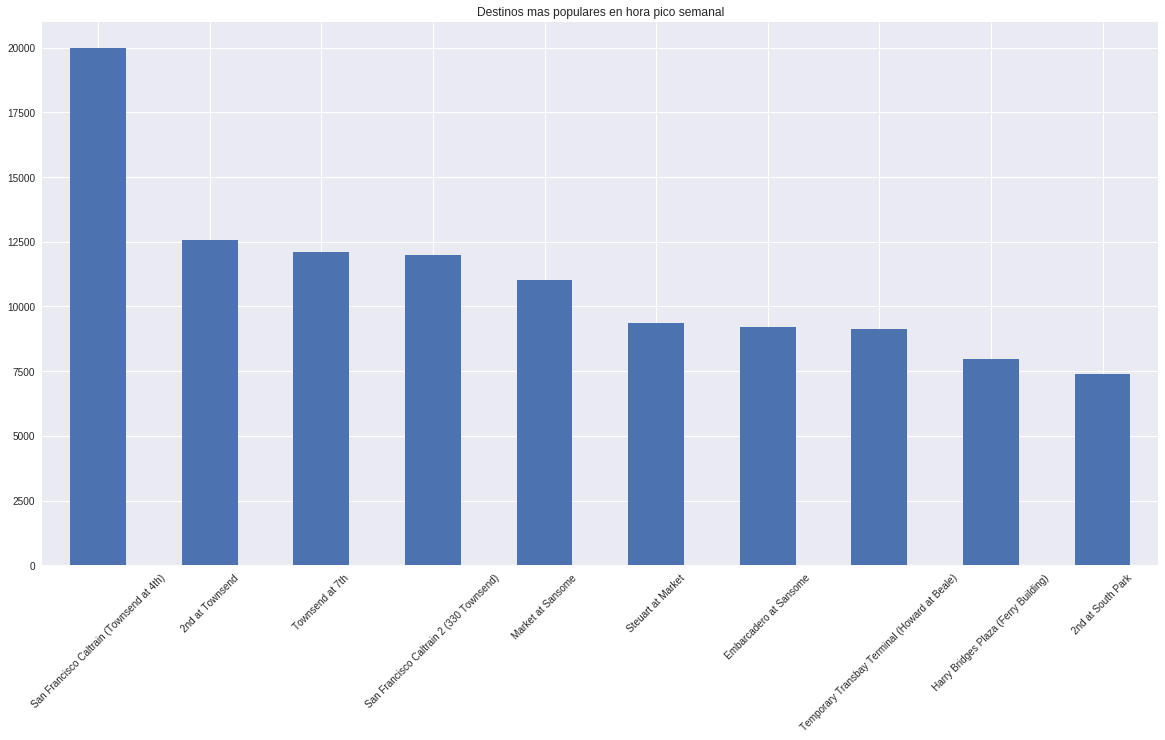

In [34]:
destinos_mas_populares_hora_pico_semana.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares en hora pico semanal');

Estos son los 10 destinos más populares durante las horas pico en la semana. En primer lugar se destaca el Caltrain, donde una gran cantidad de gente se dirige luego de trabajar para regresar a sus casas. Las demás estaciones presentan áreas de mucho movimiento de gente: empresas, comercios, etc, y también se encuentra el puerto, por lo que lo más probable es que la gente se dirija allí para concurrir a trabajar.

In [35]:
# función que dado un dataframe con un campo 'start_station_name' y otro 'end_station_name',
# devuelve un diccionario con los start_station como clave y como valor un diccionario con clave el end_station
# y valor la cantidad de viajes de ese trayecto. También devuelve una lista con el trayecto con mayor cantidad
# de viajes junto con el start y end station del mismo. Orden = O(n) siendo n la cantidad de rows del dataframe.
def contador_viajes(dataframe):
    cont_viajes = {}
    viaje_mas_popular = []
    viaje_mas_popular.append(0)
    viaje_mas_popular.append("")
    viaje_mas_popular.append("")
    for index,row in dataframe.iterrows():
        
        if row['start_station_name'] not in cont_viajes:
            cont_viajes[row['start_station_name']] = {}
           
        if row['end_station_name'] not in cont_viajes[row['start_station_name']]:
            cont_viajes[row['start_station_name']][row['end_station_name']] = 1
        else:
            cont_viajes[row['start_station_name']][row['end_station_name']] += 1
        
        if cont_viajes[row['start_station_name']][row['end_station_name']] > viaje_mas_popular[0]:
            viaje_mas_popular[0] = cont_viajes[row['start_station_name']][row['end_station_name']]
            viaje_mas_popular[1] = row['start_station_name']
            viaje_mas_popular[2] = row['end_station_name']
    
    return cont_viajes,viaje_mas_popular

In [36]:
contador_de_viajes_hora_pico_semana,viaje_mas_popular_hora_pico_semana = contador_viajes(viajes_en_hora_pico_semana)
viaje_mas_popular_hora_pico_semana

[3014, 'San Francisco Caltrain 2 (330 Townsend)', 'Townsend at 7th']

Con esto se ve que el viaje más realizado en hora pico durante la semana es el trayecto San Francisco Caltrain 2 (330 Townsend) - Townsend at 7th.

In [37]:
destinos_mas_populares_hora_pico_finde = viajes_en_hora_pico_finde['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_hora_pico_finde = destinos_mas_populares_hora_pico_finde.head(10)

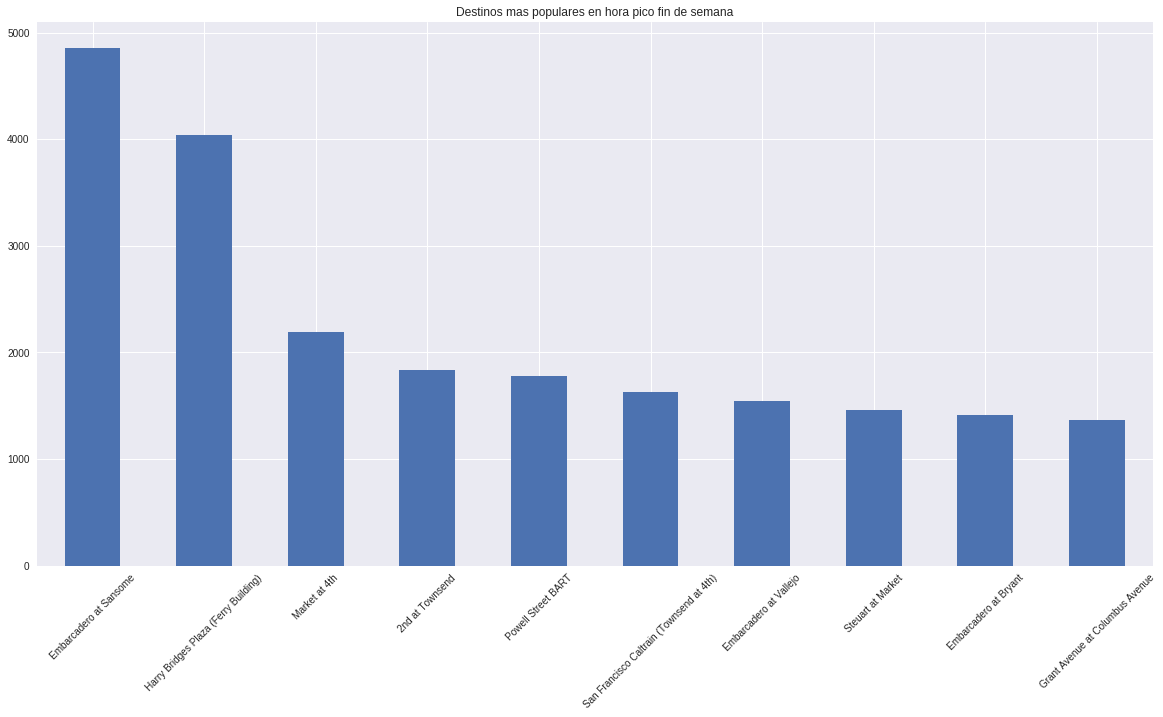

In [38]:
destinos_mas_populares_hora_pico_finde.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares en hora pico fin de semana');

Aqui se encuentran los 10 destinos más populares para las horas pico del fin de semana. Se puede apreciar que los mismos se caracterizan por ser lugares muy atractivos para pasear y hacer actividades de ocio.

In [39]:
contador_de_viajes_hora_pico_finde,viaje_mas_popular_hora_pico_finde = contador_viajes(viajes_en_hora_pico_finde)
viaje_mas_popular_hora_pico_finde

[1068, 'Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome']

Con esto se ve que el viaje más realizado en hora pico durante el fin de semana es el trayecto Harry Bridges Plaza (Ferry Building) - Embarcadero at Sansome. Además estos dos son los destinos más concurridos las horas pico de los fines de semana. Un posible uso de esta información podría ser para fines comerciales, ya que esto da la pauta que por esta zona es donde más concentración de gente se encuentra. 

In [90]:
viernes_y_sab = semana_entera[(semana_entera['start_day_of_week'] == "Saturday") | (semana_entera['start_day_of_week'] == "Friday")]
viernes_y_sab_noche = viernes_y_sab[(viernes_y_sab['horario_inicial_float'] >= 20) & (viernes_y_sab['horario_inicial_float'] < 24)]

In [91]:
destinos_mas_populares_viernes_y_sab_noche = viernes_y_sab_noche['end_station_name'].value_counts().sort_values(ascending=False)
destinos_mas_populares_viernes_y_sab_noche = destinos_mas_populares_viernes_y_sab_noche.head(10)

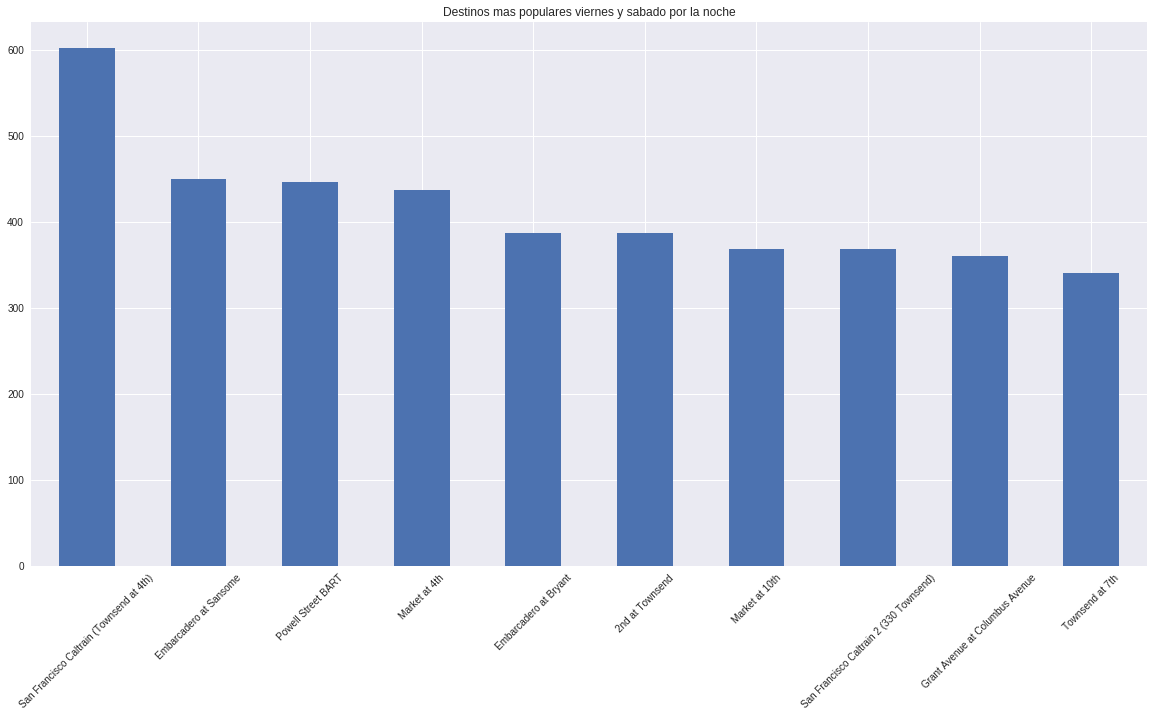

In [92]:
destinos_mas_populares_viernes_y_sab_noche.plot(kind='bar', rot=45, figsize=(20,10));
plt.title('Destinos mas populares viernes y sabado por la noche');

Estos son los destinos más frecuentados los viernes y sábados por la noche. Se analizó aparte del domingo ya que estos son los días que al día siguiente por lo general no se trabaja/concurre a estudiar, por lo que la gente se podría dormir más tarde y planear otro tipo de salida. Se destacan entre los lugares más frecuentados las estaciones Powell Street BART y Market at 4th, las cuales están rodeadas de shoppings, restaurantes y demás.

## B) Análisis relacionado a las duraciones de los viajes
### B.1) - ¿Viajes más largos en la semana o el fin de semana?

In [64]:
semana_entera_con_duracion = trips[['start_day_of_week','horario_inicial_float', 'start_station_name', 'end_station_name','duracion_viaje','duration']].round()
semana_entera_con_duracion.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration
4,Thursday,12.0,South Van Ness at Market,Market at 10th,00:02:00,83
6,Thursday,13.0,Santa Clara at Almaden,Adobe on Almaden,00:02:00,109
9,Thursday,11.0,San Jose City Hall,MLK Library,00:02:00,114
10,Thursday,14.0,Spear at Folsom,Embarcadero at Bryant,00:03:00,125
11,Thursday,13.0,San Pedro Square,Santa Clara at Almaden,00:02:00,126


## ¿Viajes de más de 8 horas de duración?
Se pueden esperar viajes muy largos de a lo sumo 8 horas de alguien que decidió recorrer varios puntos de la ciudad y aparte en el medio ir parando, pero ya cuando se excede esto hasta casos que incluso superan un día de uso creemos que hubo datos mal cargados o algún otro problema como la incorrecta devolución de la bicicleta. Por eso se van a filtrar esos viajes.

In [65]:
viajes_larguisimos = semana_entera_con_duracion[semana_entera_con_duracion['duracion_viaje'] > "08:00:00"]
semana_entera_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['duracion_viaje'] > "08:00:00")]
# hay que hacer semana_entera_con_duracion - viajes_larguisimos para que quede lindo pero requiere un comando (isin o algo asi). 
# no me salio bien asi que a lo ultimo lo modifico
viajes_larguisimos.head()

,start_day_of_week,horario_inicial_float,start_station_name,end_station_name,duracion_viaje,duration
743,Thursday,15.0,Mountain View City Hall,Park at Olive,0 days 14:38:00,52698
744,Thursday,13.0,Market at 4th,Harry Bridges Plaza (Ferry Building),0 days 23:36:00,84990
745,Thursday,13.0,Market at 4th,Harry Bridges Plaza (Ferry Building),0 days 23:43:00,85385
746,Thursday,21.0,Embarcadero at Folsom,Davis at Jackson,0 days 23:56:00,86102
747,Thursday,13.0,Mountain View Caltrain Station,Mountain View City Hall,1 days 03:08:00,97713


In [45]:
viajes_larguisimos.start_day_of_week.count()

1884

Se filtraron unos 1884 viajes.

In [46]:
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Saturday")]
semana_con_duracion = semana_entera_con_duracion[-(semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [47]:
finde_con_duracion = semana_entera_con_duracion[(semana_entera_con_duracion['start_day_of_week'] == "Saturday") | (semana_entera_con_duracion['start_day_of_week'] == "Sunday")]

In [48]:
semana_con_duracion.duration.mean() / 60 # resultado en minutos

13.467938160917344

In [49]:
finde_con_duracion.duration.mean() / 60 # resultado en minutos

30.593984232967284

Los viajes en promedio duran más los fines de semana. Esto tiene lógica ya que los fines de semana la gente puede usar más tiempo para pasear con la bicileta sin tener un destino en particular cuando durante la semana la gente busca ir al trabajo o lugar donde ejercer sus obligaciones.
Igualmente hay que considerar que esta estadística podría estar dañada por muchos viajes "largos" en el fin de semana, por ejemplo de más de dos horas, que harían subir el promedio general, sin haber tantos viajes con un horario parecido al promedio calculado. A continuación se analizará eso:

In [50]:
semana_con_duracion[semana_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

8250

In [51]:
finde_con_duracion[finde_con_duracion['duracion_viaje'] > "02:00:00"].start_day_of_week.count()

4886

Se observa que tanto en la semana como los fines de semana hay viajes de más de 2 horas, y que ya que la semana tiene más días que el fin de semana y la estadística muestra que son casi el doble de viajes, en promedio esos viajes largos se dan por igual todos los días, por lo que el probema de que haya viajes largos no afecta el resultado de la estadística anterior.

### B.2) - Trayectos interesantes
### A continuación se analizarán los trayectos más frecuentes según un criterio de duración y demás fitros.

In [52]:
finde_viajes_largos = finde_con_duracion[finde_con_duracion['duracion_viaje'] > "00:30:00"]

In [53]:
contador_de_viajes_largos_finde,viaje_largo_mas_popular_finde = contador_viajes(finde_viajes_largos)
viaje_largo_mas_popular_finde

[557,
 'Harry Bridges Plaza (Ferry Building)',
 'Harry Bridges Plaza (Ferry Building)']

Con esto se ve que los viajes mayores a 30 minutos los fines de semana son tanto de inicio como fin la estación Harry Bridges Plaza (Ferry Building). El objetivo de este análisis fue encontrar el trayecto más popular de los fines de semana que sea orientado a pasear (por eso el filtro de la duración). El resultado muestra que el viaje más realizado es empezar en dicha estación, recorrer por más de 30 minutos, y luego volver a esta misma dejar la bicicleta.

In [54]:
harry_harry = finde_viajes_largos[(finde_viajes_largos['start_station_name'] == 'Harry Bridges Plaza (Ferry Building)') & (finde_viajes_largos['end_station_name'] == 'Harry Bridges Plaza (Ferry Building)')]
harry_harry.describe()

,horario_inicial_float,duracion_viaje,duration
count,557.000000,557,557.000000
mean,13.199282,0 days 02:33:30.377019,9207.940754
std,3.028308,0 days 01:45:57.032306,6356.601234
min,5.000000,0 days 00:31:00,1811.000000
25%,11.000000,0 days 01:13:00,4364.000000
50%,13.000000,0 days 01:58:00,7122.000000
75%,15.000000,0 days 03:51:00,13818.000000
max,21.000000,0 days 07:56:00,28549.000000


Como se puede apreciar, estos viajes se caracterizan por su duración promedio de 2 horas y media y que en promedio salen a las 13hs. Esto da la pauta de qué elige la mayoría de gente a la hora de pasear por un largo rato aprovechando el clima de recién entrada la tarde.

In [55]:
semana_viajes_cortos = semana_con_duracion[(semana_con_duracion['duracion_viaje'] > "00:08:00") & (semana_con_duracion['duracion_viaje'] < "00:20:00")]

In [56]:
contador_de_viajes_cortos_semana,viaje_corto_mas_popular_semana = contador_viajes(semana_viajes_cortos)
viaje_corto_mas_popular_semana

[3247, 'Steuart at Market', 'San Francisco Caltrain (Townsend at 4th)']

In [57]:
steuart_caltrain = semana_viajes_cortos[(semana_viajes_cortos['start_station_name'] == 'Steuart at Market') & (semana_viajes_cortos['end_station_name'] == 'San Francisco Caltrain (Townsend at 4th)')]
steuart_caltrain.describe()

,horario_inicial_float,duracion_viaje,duration
count,3247.000000,3247,3247.000000
mean,14.825685,0 days 00:11:38.158299,697.412073
std,3.959800,0 days 00:01:58.426460,116.468743
min,0.000000,0 days 00:09:00,486.000000
25%,14.000000,0 days 00:10:00,615.000000
50%,16.000000,0 days 00:11:00,673.000000
75%,17.000000,0 days 00:13:00,757.000000
max,23.000000,0 days 00:19:00,1182.000000


Con esto se ve que el viaje entre 8 y 20 minutos más popular los días de semana es el trayecto Steuart at Market - San Francisco Caltrain (Townsend at 4th). El objetivo de este análisis fue encontrar el trayecto con una duración normal que más se haga considerando el tráfico que presenta un día semanal. Una posible conclusión debido a la hora promedio de comienzo de los viajes (15hs) es que la gente al terminar de trabajar se dirige desde Steuart at Market (un lugar con mucho movimiento por lo que deducimos que mucha gente trabaja por esa zona) en bicicleta hasta el Caltrain, y toma este transporte para volver a sus casas.

In [58]:
# estadisticas meses: 
# como afecta que sean vacaciones (cualquier tipo de vacaciones) (comparar con cantidad de viajes y con lo que ya hice de dias con mas viajes y horas pico)
# como afecta que sea feriado en comparacion a un dia promedio

# estadisticas años:
# año con mas viajes (crece ascendentemente el servicio?)

In [59]:
# cuántas bicicletas hay disponibles para alquilar (está en el finger 1)